In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as nlg
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity  


原始数据:
     ID    DQSCZZ  RJSCZZ      QSH    CZDW     CZJM     NCJM  DSCY    JCKZE  \
0    0  28014.94  128994   8370.4  131700  40346.3  18810.5  80.6  21943.7   
1    1  18549.19  118944  11288.9   94534  30283.6  16385.9  58.2   7645.1   
2    2  34016.32   45387  33406.8   63036  20600.3  10535.9  44.2   3378.8   
3    3  15528.42   42060   6040.5   60061  18404.0   8424.0  51.7   1162.8   
4    4  16096.21   63764  14013.2   66679  23637.8  12184.4  50.0    940.9   
5    5  23409.24   53527   6676.7   61153  25379.4  10787.3  52.6   6748.9   
6    6  14944.53   54838  13283.9   61451  20051.2  10279.4  45.8   1255.0   
7    7  15902.68   41916  11292.0   56067  19269.8  10523.9  55.8   1281.7   
8    8  30632.99  126634   7246.6  129795  42304.3  18089.8  69.2  32242.9   
9    9  85869.76  107150  53277.0   78267  27726.3  15611.5  50.3  39997.5   
10  10  51768.26   92057  31696.0   80750  31924.2  18093.4  53.3  25605.1   
11  11  27018.00   43401  29275.1   65150  20740.2  1110

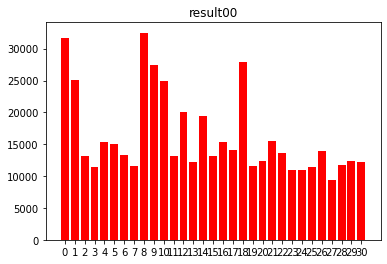

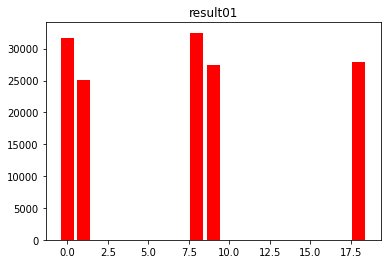

In [2]:
df = pd.read_excel(r'E:\360MoveData\Users\Dad\Desktop\数学数据1.xlsx',engine='openpyxl')
df2=df.copy()
print("\n原始数据:\n",df2)
del df2['ID']

# 皮尔森相关系数
df2_corr=df2.corr()
print("\n相关系数:\n",df2_corr)

kmo = calculate_kmo(df2)  # kmo值要大于0.7
bartlett = calculate_bartlett_sphericity(df2)  # bartlett球形度检验p值要小于0.05
print("\n因子分析适用性检验:")
print('kmo:{},bartlett:{}'.format(kmo[1], bartlett[1]))

fa = FactorAnalyzer(rotation=None, n_factors=15, method='principal')
fa.fit(df2)
fa_15_sd = fa.get_factor_variance()
fa_15_df = pd.DataFrame(
    {'特征值': fa_15_sd[0], '方差贡献率': fa_15_sd[1], '方差累计贡献率': fa_15_sd[2]})

#各个因子的特征值以及方差贡献率
print("\n",fa_15_df)

#公因子数设为5个，重新拟合
fa_5 = FactorAnalyzer(rotation=None, n_factors=5, method='principal')
fa_5.fit(df2)

#查看公因子提取度
print("\n公因子提取度:\n",fa_5.get_communalities())

#查看因子载荷
print("\n因子载荷矩阵:\n",fa_5.loadings_)

#使用最大方差法旋转因子载荷矩阵
fa_5_rotate = FactorAnalyzer(rotation='varimax', n_factors=5, method='principal')
fa_5_rotate.fit(df2)

#查看旋转后的因子载荷
print("\n旋转后的因子载荷矩阵:\n",fa_5_rotate.loadings_)

# 因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
X1 = np.mat(df2_corr)
X1 = nlg.inv(X1)

#B=(R-1)*A  15*5
factor_score = np.dot(X1,fa_5_rotate.loadings_)
factor_score = pd.DataFrame(factor_score)
factor_score.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
factor_score.index = df2_corr.columns
print("\n因子得分：\n", factor_score)

#F=XB  27*15 15*5=  27 5
fa_t_score = np.dot(np.mat(df2), np.mat(factor_score))
print("\n应试者的五个因子得分：\n",pd.DataFrame(fa_t_score))


# 综合得分(加权计算）
wei = [[0.378637], [0.224112], [0.096413], [0.082957], [0.059127]]
fa_t_score = np.dot(fa_t_score, wei) / 0.841246
fa_t_score = pd.DataFrame(fa_t_score)
fa_t_score.columns = ['综合得分']
fa_t_score.insert(0, 'ID', range(0, 31))
print("\n综合得分：\n", fa_t_score)
print("\n综合得分：\n", fa_t_score.sort_values(by='综合得分', ascending=False).head())

ax1=plt.subplot(111)
X=fa_t_score['ID']
Y=fa_t_score['综合得分']
plt.bar(X, Y, color="red")
plt.title('result00')
ax1.set_xticks(range(len(fa_t_score)))
ax1.set_xticklabels(fa_t_score.index)
plt.show()

fa_t_score1=pd.DataFrame()
fa_t_score1=fa_t_score.sort_values(by='综合得分',ascending=False).head()
X1 = fa_t_score1['ID']
Y1 = fa_t_score1['综合得分']
plt.bar(X1, Y1, color='red')
plt.title('result01')
plt.show()
